##https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne?select=train.csv.zip

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

datapath = '/content/gdrive/My Drive/ai_news/'

In [ ]:
data = pd.read_excel(datapath+'train.xlsx', encoding='utf-8' )
# data = pd.read_csv(datapath+'pre_processed_news_df.csv', encoding='utf-8' )
# data = pd.read_csv(datapath+'tnse_data.csv', encoding='utf-8' )

In [ ]:
data

,id,web,content,label,name
0,1,https://news.cnyes.com/news/id/4352432,近年來投資市場波動越來越明顯，追求低波動、絕對報酬的量化交易備受注目。專家表示，採用量化交易...,0,[]
1,2,https://udn.com/news/story/120775/4112519,10月13日晚間發生Uber Eats黃姓外送人員職災死亡案件，北市府勞動局認定業者未依職業...,0,[]
2,3,https://www.mirrormedia.mg/story/20191008soc011/,福勵、樂活、富勝3家公司的員工向本刊控訴，君鴻酒店遭法拍疑點重重，已經影響君鴻600多位員工...,0,[]
3,4,https://www.chinatimes.com/realtimenews/201909...,君鴻酒店業者控訴高雄地院強制法拍龐大資產，是為了讓財團得利。君鴻業主表示，拍得君鴻的凱德唐公...,0,[]
4,5,http://domestic.judicial.gov.tw/abbs/wkw/WHD9H...,主旨：公告本院108年度司家催字第58號公示催告事件裁定。\n依據：家事事件法第137 條、...,0,[]
...,...,...,...,...,...
4871,5019,https://udn.com/news/story/120538/4032584,香港特首林鄭月娥4日宣布撤回逃犯條例修訂，示威者斥為「太遲太少」，「一碗水救不了森林大火...,0,[]
4872,5020,https://news.cnyes.com/news/id/4357901,OTC 持續向上推進，今天的好消息是，最快在兩週內，美方就會對美國企業批准發放許可，重啟對華...,0,[]
4873,5021,http://www.coolloud.org.tw/node/93286,近日教育部在媒體上宣布駁回世新大學社發所的停招申請案，但卻沒同時宣布其他大學類似的申...,0,[]
4874,5022,https://www.chinatimes.com/realtimenews/201907...,史上金額最大開發案「台北雙子星」最優申請人「南海團隊」香港商南海發展有限公司、馬來西亞商馬頓...,0,[]


In [ ]:
pip install -U ckiptagger[tfgpu,gdown]


     |████████████████████████████████| 411.0MB 25kB/s 
     |████████████████████████████████| 512kB 36.4MB/s 
     |████████████████████████████████| 3.8MB 34.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=cec834b2d261df279176571e7b666ab318f7aa196b2591bb4adbbcc730817f99
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.

In [ ]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import re
ws = WS(datapath+"/data")    #斷詞
pos = POS(datapath+"/data")   #詞性標記
ner = NER(datapath+"/data")   #命名實體識別

In [ ]:
import jieba
import jieba.posseg as pseg
import jieba.analyse
!wget https://www.dropbox.com/s/ikv3n0fzb218vgn/dict.txt.big
jieba.set_dictionary(datapath+'dict.txt.big')   #下載繁體中文詞庫後，使用set_dictionary()方法匯入
#載入停用字
with open(datapath+'stopword.txt','r',encoding='utf-8-sig') as file:
  sw = file.read().split('\n')
print("停用詞"+'|' .join(sw))

--2020-07-28 01:37:51--  https://www.dropbox.com/s/ikv3n0fzb218vgn/dict.txt.big
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ikv3n0fzb218vgn/dict.txt.big [following]
--2020-07-28 01:37:51--  https://www.dropbox.com/s/raw/ikv3n0fzb218vgn/dict.txt.big
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2ec0525900e54b89116cecdccd.dl.dropboxusercontent.com/cd/0/inline/A8U2NaO0Cwg2NPZTArtZ-VUBz_s0gSjoOZ575dyaXCPzRibosloyGT9DtJBcQf_R8yKmXLhXxduGxGlFBCg4zNz3GlplfWIlTjM4vuXyscOHOQ/file# [following]
--2020-07-28 01:37:52--  https://uc2ec0525900e54b89116cecdccd.dl.dropboxusercontent.com/cd/0/inline/A8U2NaO0Cwg2NPZTArtZ-VUBz_s0gSjoOZ575dyaXCPzRibosloyGT9DtJBcQf_R8yKmXLhXxduGxGlFBCg4zNz3GlplfWIlTjM4vuXyscOHOQ/file
Resolving uc2ec0525

In [ ]:
fn = pd.read_csv(datapath+'CFN_TN.txt', sep=" ",header=None)   #姓氏

In [ ]:
text = data.content[1186]

ws_results = ws([text])
pos_results = pos(ws_results)
ner_results = ner(ws_results, pos_results)

In [ ]:
xin_ming= set({})
for name in ner_results[0]:
  if name[2]=='PERSON':
        xin_ming.add(name[3])
list(xin_ming)

['，施男', '吳茂達', '思柏', '米迪亞', '普萊普雷', '吳男', '施允澤']

In [ ]:
sentence = data.content[1186]

ws_results = ws([sentence])

for word in ws_results:
  if word in sw:
    sent2 = "".join('')
  else:
    sent2 = " ".join(word)
    # print(word)
        
regex = re.compile('([^\s\w]|_)+')
sent2 = regex.sub('', sent2)
sent2 = ' '.join(sent2.split())
sent2

'前 職棒 米迪亞 暴龍隊 老闆 施允澤 原名 施建 新 遭 控 利用 普萊普雷 公司 虛偽 增資 非 常 規 交易 挪用 公司 資產 不實 金流 沖銷 美化 帳面 數字 從 中 獲利 數千萬 元 新北 地檢署 16日 依 偽造 文書 背信 等 罪 起訴 施允澤 及 登記 負責人 吳茂達 等 人 檢方 調查 原名 施建 新 的 施允澤 為 普萊普雷 鑫奕 國際 等 公司 負責人 施男 涉嫌 在 2009年 開始 三 度 將 普萊普雷 公司 虛偽 增資 讓 外界 誤認 該 公司 具有 資力 另 施允澤 也 遭 控 對 外 宣稱 普萊普雷 擁有 關鍵字 廣告 專利 邀請 不 知情 人士 投資 2013年 間 施允澤 又 以 普萊普雷 和 思柏 公司 合作 開發 燃料 電池 專利 名義 以 1億5000萬 元 增資 思柏 公司 並 以 5000萬 元 購買 吳男 手 中 的 思柏 股權 但 匯入 思柏 與 吳男 帳戶 的 錢 隨即 被 轉出 輾轉 匯回 施男 帳戶 但 實際 上 這 6 項 燃料 電池 相關 專利 並 未 經過 合理 鑑價 亦 無 實際 經濟 收益 普萊普雷 公司 也 因此 受到 損害 另外 施男 也 遭 控 以 對 外 投資 交易 以 出售 股權 衛星 設備 方式 輾轉 挪用 普萊普雷 公司 資產 為 彌補 美化 帳面 數字 施允澤 挪用 公司 資金 製作 虛偽 金流 再 利用 層層 轉匯 手法 沖銷 挪用 公司 款項 情事 造成 財報 不實 及 股東 損失 另 施允澤 也 被 查出 涉 以 不實 的 顧問費 製造 虛偽 憑證 新北 地檢署 歷經 多 年 偵辦 16日 依 偽造 文書 背信 等 罪嫌 起訴 施允澤 吳茂達 等 7 人 中時'

In [ ]:
def clean_sentence(val):
    ws_results = ws([val])
    for word in ws_results:       #依據CKIP斷詞
      if word in sw:
        sent2 = "".join('')     #依據stopword清除
      else:
        sent2 = " ".join(word)
        # print(word) 去除符號
    sent2 = regex.sub('', sent2)
    sent2 = ' '.join(sent2.split())
    return sent2

def clean_dataframe(data):
    "刪除NA"
    data = data.dropna(how="any")
    
    for col in ['content']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

,id,web,content,label,name
0,1,https://news.cnyes.com/news/id/4352432,近年 來 投資 市場 波動 越來越 明顯 追求 低 波動 絕對 報酬 的 量化 交易 備受 ...,0,[]
1,2,https://udn.com/news/story/120775/4112519,10月 13日 晚間 發生 Uber Eats 黃姓 外送 人員 職災 死亡 案件 北市府 ...,0,[]
2,3,https://www.mirrormedia.mg/story/20191008soc011/,福勵 樂活 富勝 3 家 公司 的 員工 向 本 刊 控訴 君鴻 酒店 遭 法拍 疑點 重重...,0,[]
3,4,https://www.chinatimes.com/realtimenews/201909...,君鴻 酒店 業者 控訴 高雄 地院 強制 法 拍 龐大 資產 是 為了 讓 財團 得利 君鴻...,0,[]
4,5,http://domestic.judicial.gov.tw/abbs/wkw/WHD9H...,主旨 公告 本 院 108年度 司家 催字 第58 號 公示 催告 事件 裁定 依據 家事 ...,0,[]


In [ ]:
data.to_excel(datapath+"tnse_data.xlsx")

In [ ]:
data = pd.read_excel(datapath+'tnse_data.xlsx', encoding='utf-8' )

In [ ]:
data.drop(data[data.label==0].index, inplace= True)

In [ ]:
def build_corpus(data):
    #創造語料庫
    corpus = []
    for col in ['content']:
        for sentence in data[col].iteritems():
            word_list= sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['自稱',
  '房產',
  '幽默',
  '大師',
  '的',
  '王派宏',
  '涉吸金',
  '捲款',
  '25億',
  '落跑',
  '他',
  '自稱',
  '炒房',
  '專家',
  '在',
  '全',
  '台',
  '授課',
  '分享',
  '理財',
  '卻',
  '遭',
  '指控',
  '4月',
  '28號',
  '突然',
  '聯繫',
  '不',
  '上',
  '也',
  '沒',
  '上課',
  '顧問',
  '公司',
  '以為',
  '他',
  '發生',
  '危險',
  '立刻',
  '報案',
  '但',
  '人',
  '卻',
  '已經',
  '離開',
  '台灣',
  '被',
  '害',
  '的',
  '投資人',
  '懷疑',
  '王派宏',
  '已經',
  '捲款',
  '急忙',
  '報警',
  '追人',
  '男言',
  '之',
  '癮',
  '男人',
  '一',
  '看',
  '上癮',
  '自稱',
  '房產',
  '幽默',
  '大師',
  '的',
  '王派宏',
  '涉吸金',
  '捲款',
  '25億',
  '落跑',
  '圖',
  '東森',
  '新聞',
  '被害人',
  '小吳',
  '他',
  '有',
  '提到',
  '從',
  '台灣',
  '帶',
  '黃金',
  '到',
  '印度',
  'ㄧ',
  '個',
  '月',
  '會',
  '有',
  '3',
  '分紅',
  '除了',
  '他',
  '介紹',
  '以外',
  '透過',
  '很多',
  '學員',
  '都',
  '已經',
  '開始',
  '投資',
  '而且',
  '過去',
  '2',
  '3',
  '年',
  '都',
  'ok',
  '都',
  '有',
  '如期',
  '拿到',
  '利息',
  '的確',
  '有',
  '固定',
  '利息',
  '從小',
  '金額',
  '100多萬',
  '到',
  '後面',
  '越',
  '投',
  

In [ ]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)

In [ ]:
model.wv['涉']

In [ ]:
from matplotlib.font_manager import FontProperties
# font = FontProperties(fname=r"/usr/share/fonts/truetype/liberation/Microsoft JhengHei.ttf", size=14)
font = FontProperties(fname=datapath+r"Microsoft JhengHei.ttf", size=14)

def tsne_plot(model):
    "建立TSNE與畫圖"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],fontproperties=font,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


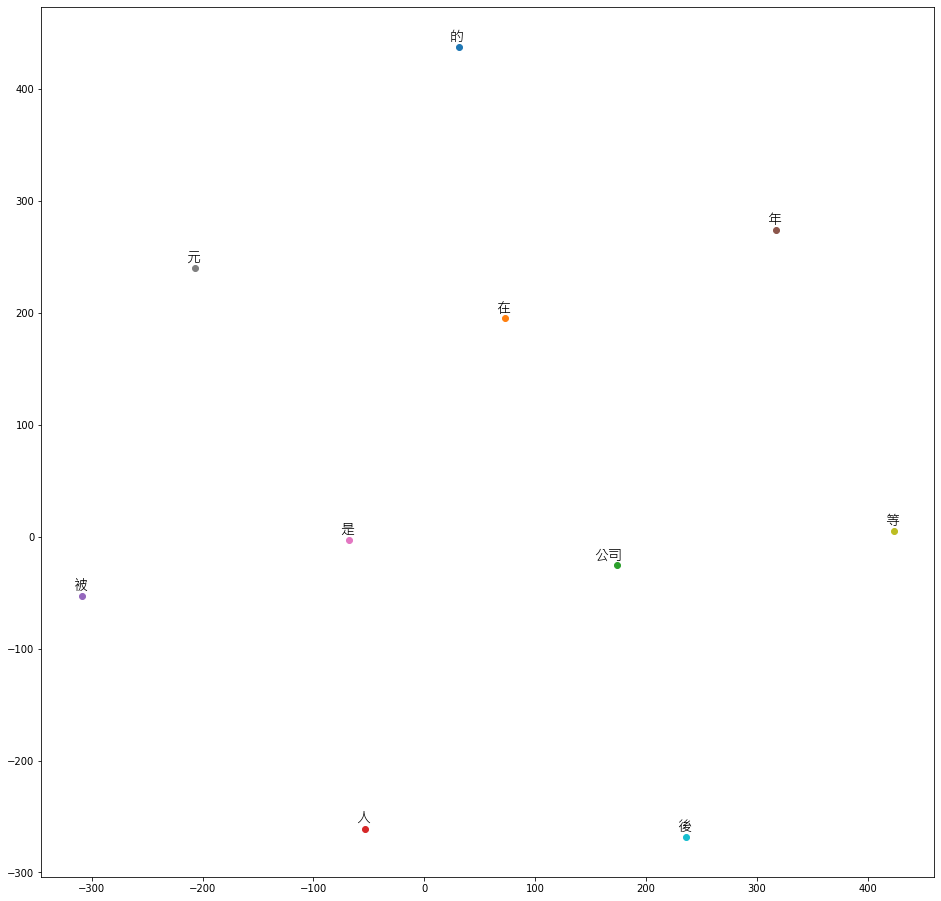

In [ ]:
# A more selective model
# size:這表示的是訓練出的詞向量會有幾維
# window:能往左往右看幾個字的意思
# workers:執行緒數目，除非電腦不錯，不然建議別超過 4
# min_count:若這個詞出現的次數小於min_count，那他就不會被視為訓練對象
model = word2vec.Word2Vec(corpus, size=10, window=20, min_count=600, workers=4)
tsne_plot(model)

In [ ]:
# import matplotlib
# print(matplotlib.__path__)
# cd "/usr/local/lib/python3.6/dist-packages/matplotlib"
# cd "mpl-data/fonts/ttf"
# zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/Microsoft JhengHei.ttf')

In [ ]:
model.most_similar('狀況')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('正常', 0.5830886960029602),
 ('造成', 0.5329867601394653),
 ('目前', 0.5222979784011841),
 ('因素', 0.515897274017334),
 ('導致', 0.5108882188796997),
 ('無法', 0.4958624541759491),
 ('因此', 0.4876996874809265),
 ('是否', 0.4875349700450897),
 ('情況', 0.48086684942245483),
 ('受到', 0.47904688119888306)]